In [1]:
## Importing libraries
import numpy as np
import pandas as pd
from random import randint
pd.set_option('max_columns', None)


!pip3 install catboost

import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, accuracy_score,precision_score, recall_score, classification_report, f1_score, average_precision_score, precision_recall_fscore_support, roc_auc_score)
from sklearn.decomposition import PCA
#from catboost import CatBoostClassifier
#from lightgbm import LGBMClassifier 

#import xgboost as XGB
#import lightgbm as lgb

from imblearn.over_sampling import SMOTE

import warnings

#Ignore warnings
warnings.filterwarnings(action='ignore')

In [2]:
####### Reading data
data = pd.read_csv("D:\\515_bankruptcy.csv")
data.columns = [i.title().strip() for i in list(data.columns)]

row = data.shape[0]
col = data.shape[1]
print("The number of rows within the dataset are {} and the number of columns is {}".format(row,col))

The number of rows within the dataset are 6819 and the number of columns is 96


In [3]:
############ Shows the features
data.info()
df=data.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Bankrupt?                                                6819 non-null   int64  
 1   Roa(C) Before Interest And Depreciation Before Interest  6819 non-null   float64
 2   Roa(A) Before Interest And % After Tax                   6819 non-null   float64
 3   Roa(B) Before Interest And Depreciation After Tax        6819 non-null   float64
 4   Operating Gross Margin                                   6819 non-null   float64
 5   Realized Sales Gross Margin                              6819 non-null   float64
 6   Operating Profit Rate                                    6819 non-null   float64
 7   Pre-Tax Net Interest Rate                                6819 non-null   float64
 8   After-Tax Net Interest Rate 

In [4]:
data.isna().sum().max()

0

In [5]:
# Checking for duplicates
data.duplicated().sum()

0

In [6]:
colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap',
          'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
          'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
          'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
          'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 
          'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 
          'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 
          'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 
          'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 
          'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 
          'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 
          'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 
          'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 
          'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 
          'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 
          'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 
          'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

0    6599
1     220
Name: Bankrupt?, dtype: int64
Companies that went bankrupt:  96.8 % of whole data set
Companies that did not go bankrupt:  3.2 % of whole data set


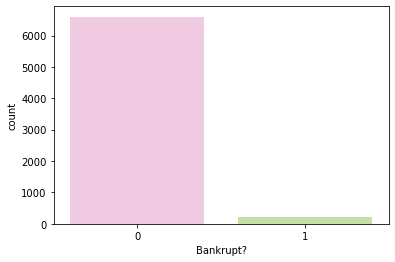

In [7]:
######################### Data Analysis
value = randint(0, len(colors)-1)
print(data['Bankrupt?'].value_counts())

sns.countplot('Bankrupt?',data=data,palette = colors[value])
print('Companies that went bankrupt: ', round(data['Bankrupt?'].value_counts()[0]/len(data) * 100,1), '% of whole data set')
print('Companies that did not go bankrupt: ', round(data['Bankrupt?'].value_counts()[1]/len(data) * 100,1), '% of whole data set')

In [8]:
numeric_features = data.dtypes[data.dtypes != 'int64'].index
categorical_features = data.dtypes[data.dtypes == 'int64'].index
data[categorical_features].columns.tolist()

['Bankrupt?', 'Liability-Assets Flag', 'Net Income Flag']

Liability-Assets Flag
0                        6811
1                           8
dtype: int64


<AxesSubplot:xlabel='Liability-Assets Flag', ylabel='count'>

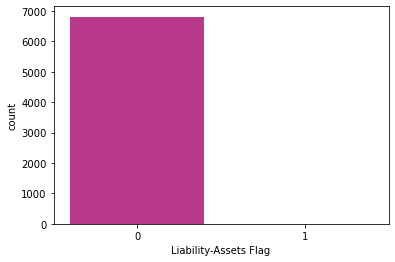

In [11]:
value = randint(0, len(colors)-1)
print(data[['Liability-Assets Flag']].value_counts())
sns.countplot('Liability-Assets Flag',data = data,palette = colors[value])
#sns.countplot('Liability-Assets Flag',hue = 'Bankrupt?',data = data,palette = colors[value])

1    6819
Name: Net Income Flag, dtype: int64
Net Income Flag
1                  6819
dtype: int64


<AxesSubplot:xlabel='Net Income Flag', ylabel='count'>

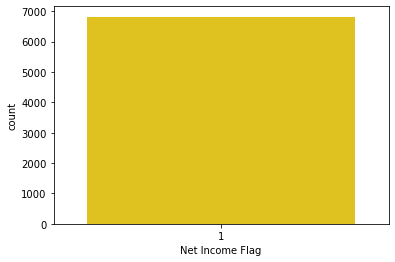

In [12]:
value = randint(0, len(colors)-1)

print(data['Net Income Flag'].value_counts())
#sns.countplot('Net Income Flag',data=data,palette = colors[value])
#value = randint(0, len(colors)-1)

value = randint(0, len(colors)-1)

print(data[['Net Income Flag']].value_counts())
sns.countplot(x = 'Net Income Flag',data = data,palette = colors[value])
#sns.countplot(x = 'Net Income Flag',hue = 'Bankrupt?',data = data,palette = colors[value])

In [13]:
positive_corr = data[numeric_features].corrwith(data["Bankrupt?"]).sort_values(ascending=False)[:6].index.tolist()
print(positive_corr )
negative_corr = data[numeric_features].corrwith(data["Bankrupt?"]).sort_values()[:6].index.tolist()
print(negative_corr)

['Debt Ratio %', 'Current Liability To Assets', 'Borrowing Dependency', 'Current Liability To Current Assets', 'Liability To Equity', 'Current Liabilities/Equity']
['Net Income To Total Assets', 'Roa(A) Before Interest And % After Tax', 'Roa(B) Before Interest And Depreciation After Tax', 'Roa(C) Before Interest And Depreciation Before Interest', 'Net Worth/Assets', 'Persistent Eps In The Last Four Seasons']


['Debt Ratio %', 'Current Liability To Assets', 'Borrowing Dependency', 'Current Liability To Current Assets', 'Liability To Equity', 'Current Liabilities/Equity']
['Net Income To Total Assets', 'Roa(A) Before Interest And % After Tax', 'Roa(B) Before Interest And Depreciation After Tax', 'Roa(C) Before Interest And Depreciation Before Interest', 'Net Worth/Assets', 'Persistent Eps In The Last Four Seasons']


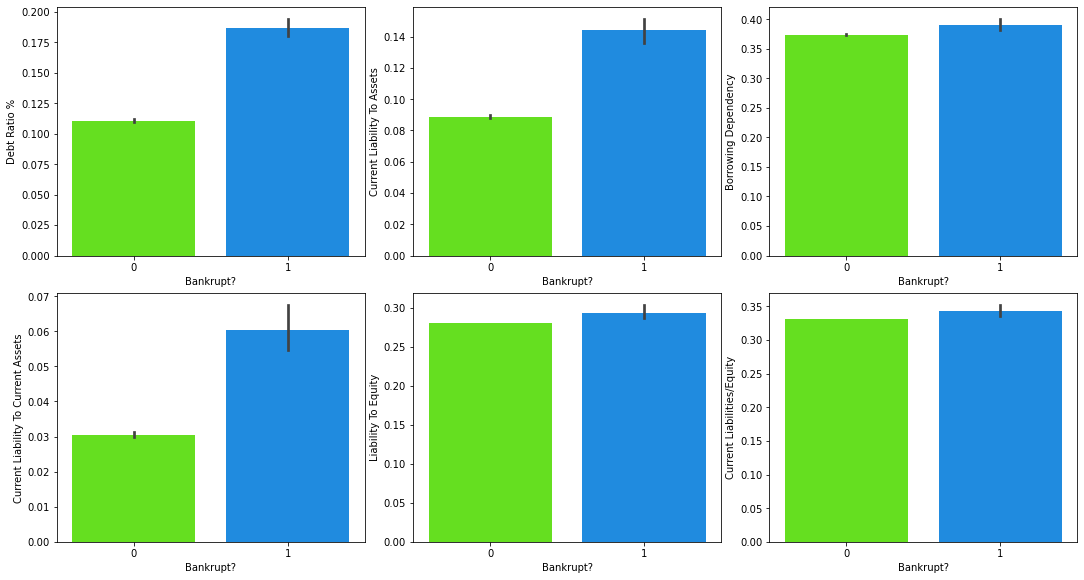

In [14]:
###################### Checking correlation
positive_corr = data[numeric_features].corrwith(data["Bankrupt?"]).sort_values(ascending=False)[:6].index.tolist()
print(positive_corr )
negative_corr = data[numeric_features].corrwith(data["Bankrupt?"]).sort_values()[:6].index.tolist()
print(negative_corr )
positive_corr = data[positive_corr + ["Bankrupt?"]].copy()
negative_corr = data[negative_corr + ["Bankrupt?"]].copy()
def corrbargraph(x_value, y_value):
    
    plt.figure(figsize=(15,8))
    value = randint(0, len(colors)-1)

    for i in range(1,7):
        plt.subplot(2,3,i)  
        sns.barplot(x = x_value, y = y_value[i-1],data = data,palette = colors[value])

    plt.tight_layout(pad=0.5)

x_value = positive_corr.columns.tolist()[-1]
y_value = positive_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)


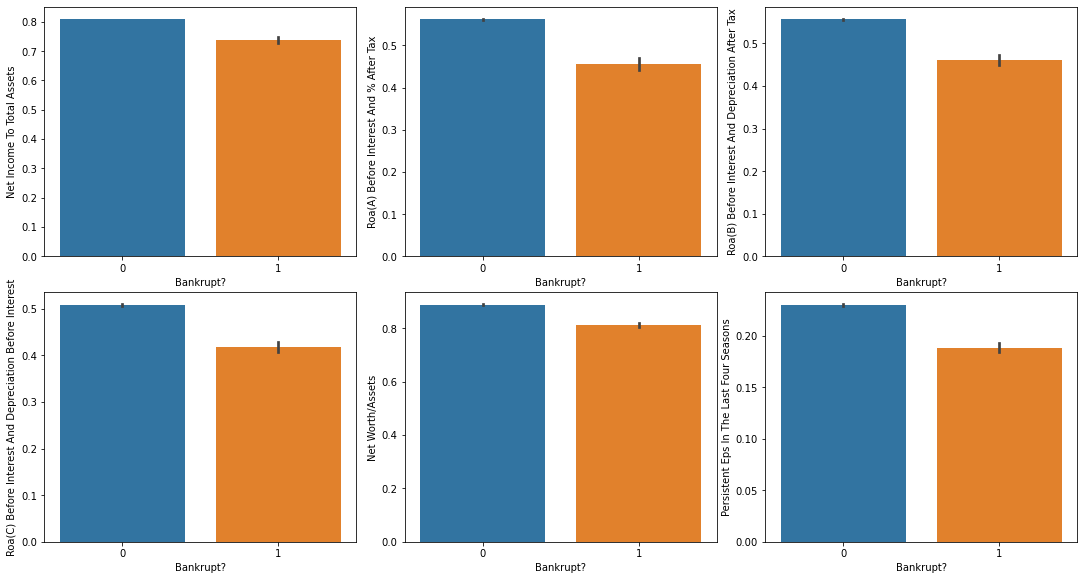

In [15]:
x_value = negative_corr.columns.tolist()[-1]
y_value = negative_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)

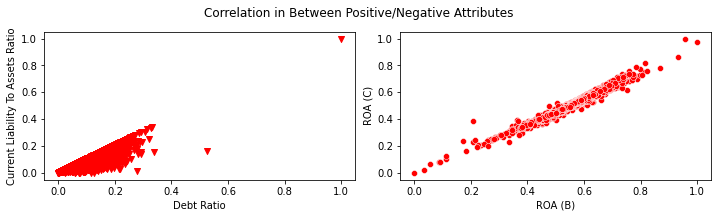

In [16]:
plt.figure(figsize=(10,3))

plt.suptitle("Correlation in Between Positive/Negative Attributes")

plt.subplot(1,2,1)
plt.xlabel("Debt Ratio")
plt.ylabel("Current Liability To Assets Ratio")
plt.scatter(data["Debt Ratio %"],data["Current Liability To Assets"], marker='v',color = 'red')

plt.subplot(1,2,2)
plt.xlabel("ROA (B)")
plt.ylabel("ROA (C)")
sns.scatterplot(data=data, x='Roa(B) Before Interest And Depreciation After Tax', y='Roa(C) Before Interest And Depreciation Before Interest',color = 'red')

plt.tight_layout(pad=0.8)

<AxesSubplot:>

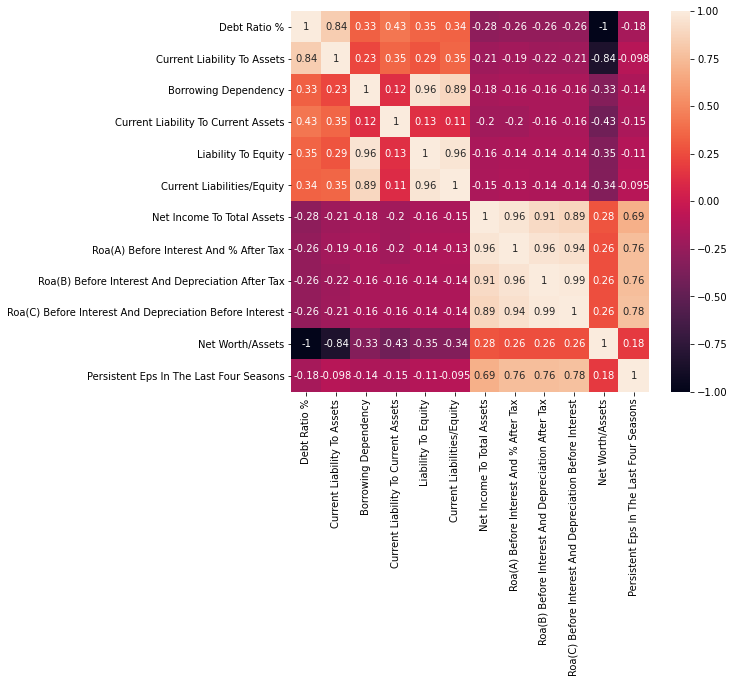

In [17]:
######## Heatmap to demonstrate correlation
relation = positive_corr.columns.tolist()[:-1] + negative_corr.columns.tolist()[:-1]
plt.figure(figsize=(8,7))
sns.heatmap(data[relation].corr(),annot=True)

In [18]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Drop single-value column
    df = df.drop('Net Income Flag', axis=1)

    #We will remove the column Net Income Flag since it has only single value

    # Split df into X and y
    y = df['Bankrupt?']
    X = df.drop('Bankrupt?', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, shuffle=True, random_state=1, stratify = y)
    
      # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

# Original Initial Model

In [19]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [20]:
original_models = {
    "Logistic Regression": LogisticRegression(solver = "liblinear", l1_ratio = 0.5),
    "K-Nearest Neighbors": KNeighborsClassifier(weights='distance', metric='euclidean'),
    "Support Vector Machine (Linear Kernel)": LinearSVC(C = 0.5),
    "Support Vector Machine (RBF Kernel)": SVC(gamma='scale', C=1.0),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(75,), activation='relu', 
                                    solver='adam', alpha=0.0001, batch_size='auto', power_t=0.5)
}

for name, model in original_models.items():
  model.fit(X_train, y_train)
  print(name + ' trained.')

Logistic Regression trained.
K-Nearest Neighbors trained.
Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.
Neural Network trained.


In [21]:
original_results = []

for name, model in original_models.items():
  result = model.score(X_test, y_test)
  original_results.append(result)

  print("""
  __________________________"""+name+"""__________________________
  """)


  model = original_models[name]
  y_test_pred = model.predict(X_test)
  arg_test = {'y_true':y_test, 'y_pred':y_test_pred}
  print(confusion_matrix(**arg_test))
  print(classification_report(**arg_test))

  print(name + ': {:.5f}%'.format(result * 100))


  __________________________Logistic Regression__________________________
  
[[1308   12]
 [  36    8]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1320
           1       0.40      0.18      0.25        44

    accuracy                           0.96      1364
   macro avg       0.69      0.59      0.62      1364
weighted avg       0.95      0.96      0.96      1364

Logistic Regression: 96.48094%

  __________________________K-Nearest Neighbors__________________________
  
[[1317    3]
 [  36    8]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1320
           1       0.73      0.18      0.29        44

    accuracy                           0.97      1364
   macro avg       0.85      0.59      0.64      1364
weighted avg       0.97      0.97      0.96      1364

K-Nearest Neighbors: 97.14076%

  __________________________Support Vector Machine (Linear Kernel)_______

In [ ]:
# Plotting confusion matrix for each classifier
from sklearn.metrics import mean_squared_error
a = 3  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(30, 18))

for name, model in original_models.items():
    original_results_smote = model.score(X_test, y_test)
    model = original_models[name]
    y_test_pred_smote = model.predict(X_test)
    arg_test = {'y_true':y_test, 'y_pred':y_test_pred_smote}
    conf_mx0 = confusion_matrix(y_test, y_test_pred_smote)
    print(mean_squared_error(y_test, y_test_pred_smote))
    heat_cm0 = pd.DataFrame(conf_mx0, columns=np.unique(y_test), index = np.unique(y_test))
    heat_cm0.index.name = 'Actual'
    heat_cm0.columns.name = 'Predicted'

    plt.subplot(a, b, c)
    #plt.title(name)
    fig.subplots_adjust(left=None, bottom=None, right= None, top=None, wspace=0.4, hspace= 0.4)
    sns.heatmap(heat_cm0, annot=True, fmt='.2f', square=True, annot_kws={"size": 16}, cmap = 'Purples').set_title(name, fontsize = 20)
    c = c + 1

plt.show()

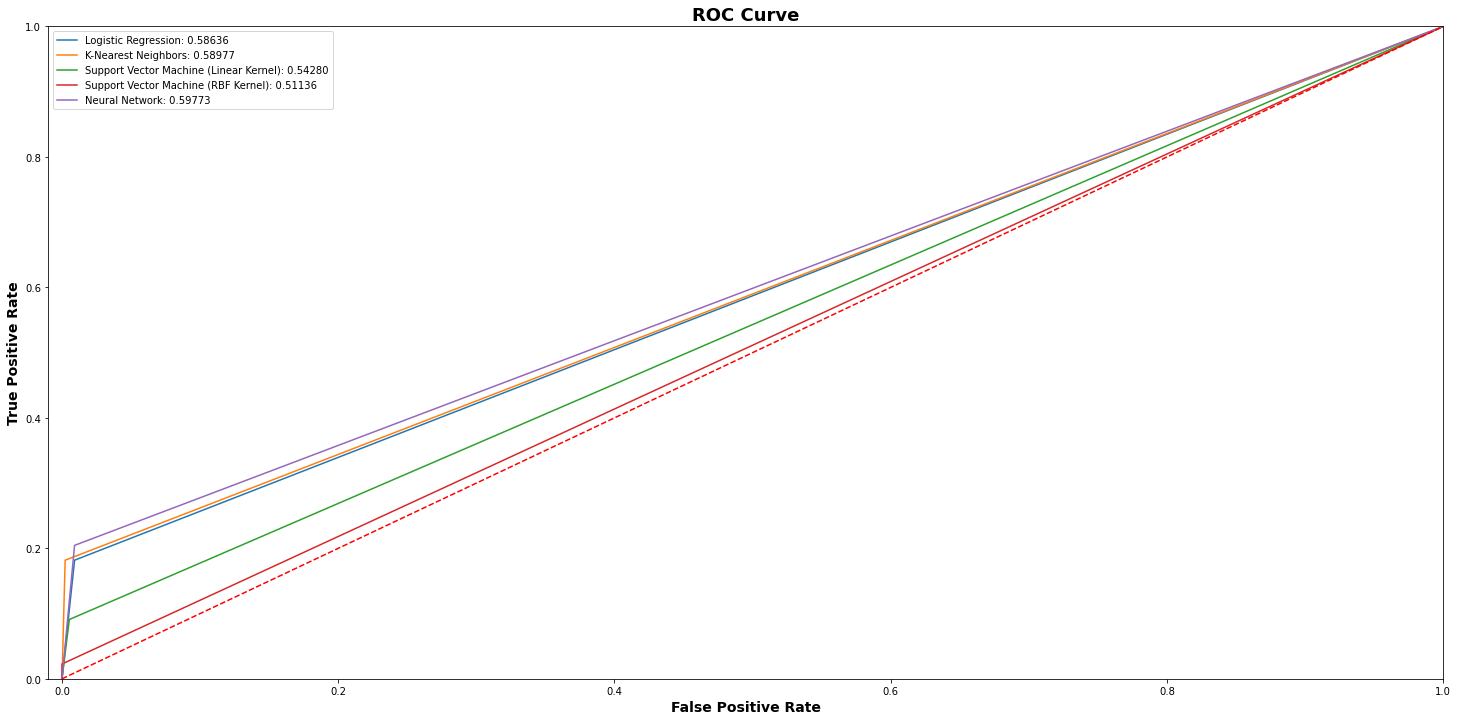

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(25,12)
from sklearn.metrics import mean_squared_error
for m in original_models:
    y_pred = original_models[m].predict(X_test)
    fpr, tpr, thresholds_nb = roc_curve(y_test, y_pred, pos_label=1)
    roc_auc = auc(fpr, tpr)
    precision_nb, recall_nb, th_nb = precision_recall_curve(y_test, y_pred,pos_label=1)
    plt.plot(fpr, tpr, label= m + ': {:.5f}'.format(roc_auc_score(y_test, y_pred)))
plt.plot([0, 1], [0, 1], 'r--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontweight='bold', fontsize=14)
plt.ylabel('True Positive Rate', fontweight='bold', fontsize=14)
plt.title('ROC Curve', fontweight='bold', fontsize=18)
plt.legend(loc='best')
plt.show()

# Model with Oversampling SMOTE - Train and Test data

In [23]:
def preprocess_inputs(df_):
    df_ = df_.copy()
    
    # Drop single-value column
    df_ = df_.drop('Net Income Flag', axis=1)

    #We will remove the column Net Income Flag since it has only single value

    # Split df into X and y
    y_ = df_['Bankrupt?']
    X_ = df_.drop('Bankrupt?', axis=1)

    #Initializing SMOTE

    sm = SMOTE(random_state = 42)
    X_smote, y_smote = sm.fit_resample(X_, y_)

    sm = SMOTE(random_state = 42)
    X_test_oversampled, y_test_oversampled = sm.fit_resample(X_smote, y_smote)
    X_smote = pd.DataFrame(X_test_oversampled, columns=X_.columns)
    
    # Train-test split
    X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, train_size = 0.8, test_size = 0.2, random_state=1, shuffle=True, stratify = y_smote)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train_smote)
    X_train_smote = pd.DataFrame(scaler.transform(X_train_smote), index=X_train_smote.index, columns=X_train_smote.columns)
    X_test_smote = pd.DataFrame(scaler.transform(X_test_smote), index=X_test_smote.index, columns=X_test_smote.columns)
    
    return X_train_smote, X_test_smote, y_train_smote, y_test_smote, y_smote

In [24]:
X_train_smote, X_test_smote, y_train_smote, y_test_smote, y_smote = preprocess_inputs(data)

In [25]:
print('X_train_smote shape is ' , X_train_smote.shape) # Train data after SMOTE
print('y_train_smote shape is ' , y_train_smote.shape) # Train data after SMOTE
print('X_test_smote shape is ' , X_test_smote.shape) # Test data after SMOTE
print('y_test_smote shape is ' , y_test_smote.shape) # Test data after SMOTE

X_train_smote shape is  (10558, 94)
y_train_smote shape is  (10558,)
X_test_smote shape is  (2640, 94)
y_test_smote shape is  (2640,)


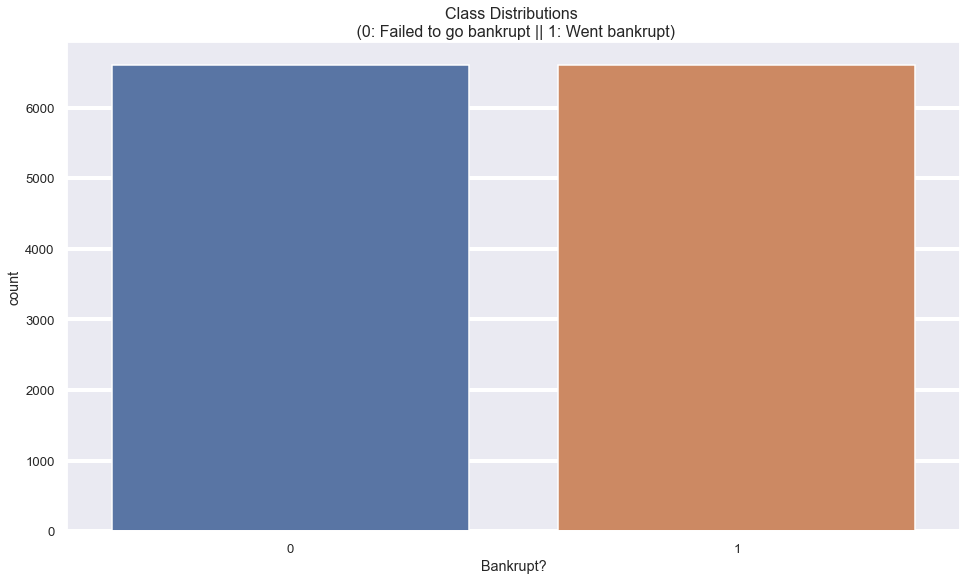

In [26]:
sns.set_theme(context = 'talk', style='darkgrid', palette='deep', font='sans-serif', font_scale = 0.8, rc={"grid.linewidth": 4})

plt.figure(figsize = (16,9))
sns.countplot(y_smote)
plt.title('Class Distributions \n (0: Failed to go bankrupt || 1: Went bankrupt)', fontsize=16)
plt.show()

In [27]:
original_models_smote_st = {
    "Logistic Regression": LogisticRegression(solver = "liblinear", l1_ratio = 0.5),
    "K-Nearest Neighbors": KNeighborsClassifier(weights='distance', metric='euclidean'),
    "Support Vector Machine (Linear Kernel)": LinearSVC(C = 0.5),
    "Support Vector Machine (RBF Kernel)": SVC(),
    "Neural Network": MLPClassifier()
}

for name, model in original_models_smote_st.items():
  model.fit(X_train_smote, y_train_smote)
  print(name + ' trained.')

Logistic Regression trained.
K-Nearest Neighbors trained.
Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.
Neural Network trained.


In [28]:
original_results_smote_st = []

for name, model in original_models_smote_st.items():
  result_smote = model.score(X_test_smote, y_test_smote)
  original_results_smote_st.append(result_smote)

  print("""
  _________________________"""+name+"""__________________________
  """)

  model = original_models_smote_st[name]
  y_test_pred_smote = model.predict(X_test_smote)
  arg_test = {'y_true':y_test_smote, 'y_pred':y_test_pred_smote}
  print(confusion_matrix(**arg_test))
  print(classification_report(**arg_test))
  print(name + ': {:.5f}%'.format(result_smote * 100))
    


  _________________________Logistic Regression__________________________
  
[[1185  135]
 [ 114 1206]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1320
           1       0.90      0.91      0.91      1320

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640

Logistic Regression: 90.56818%

  _________________________K-Nearest Neighbors__________________________
  
[[1200  120]
 [   0 1320]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95      1320
           1       0.92      1.00      0.96      1320

    accuracy                           0.95      2640
   macro avg       0.96      0.95      0.95      2640
weighted avg       0.96      0.95      0.95      2640

K-Nearest Neighbors: 95.45455%

  _________________________Support Vector Machine (Linear Kernel)__________

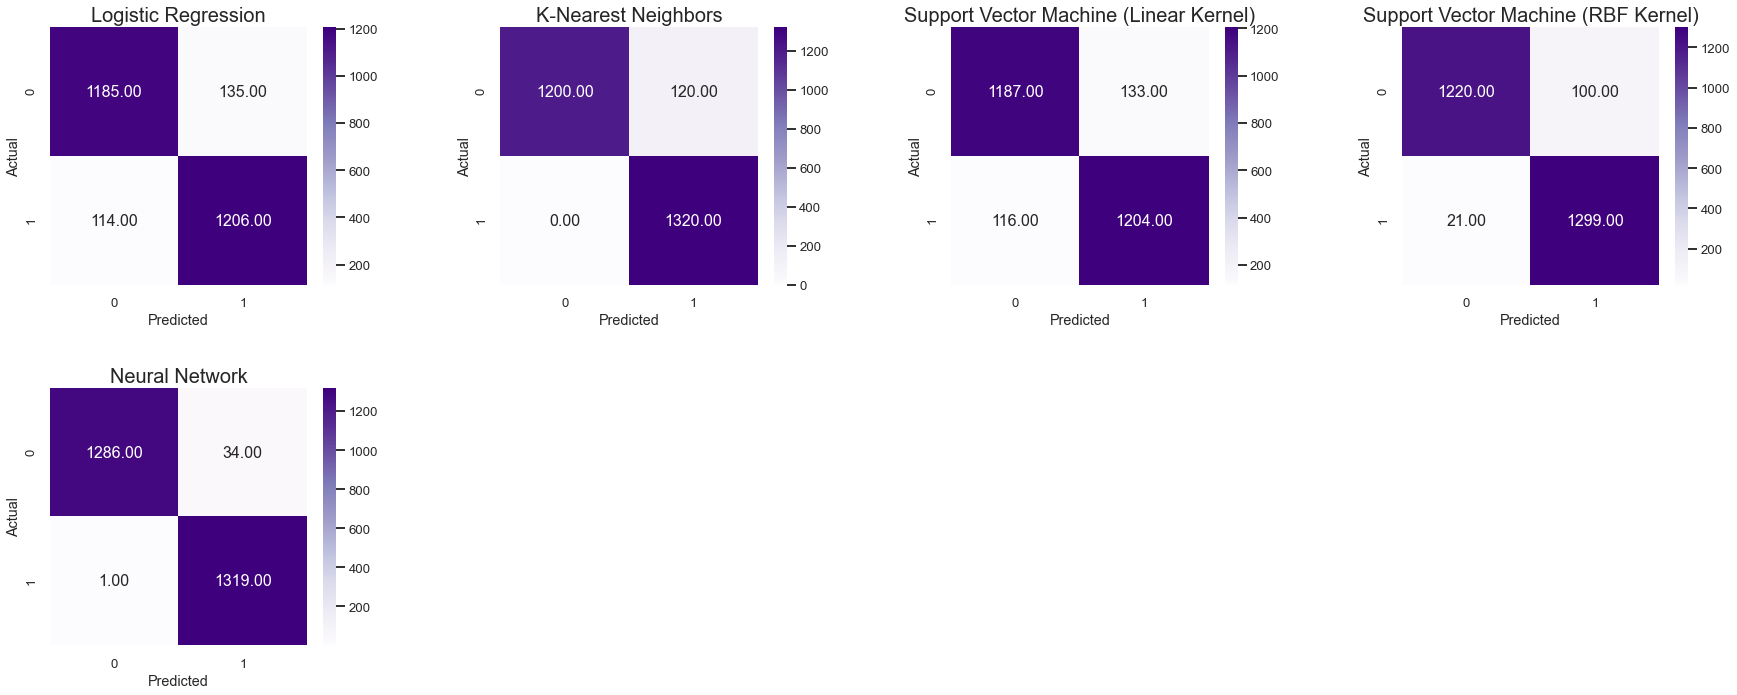

In [29]:
# Plotting confusion matrix for each classifier

a = 3  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(30, 18))

for name, model in original_models_smote_st.items():
    original_results_smote_st = model.score(X_test_smote, y_test_smote)
    model = original_models_smote_st[name]
    y_test_pred_smote = model.predict(X_test_smote)
    arg_test = {'y_true':y_test_smote, 'y_pred':y_test_pred_smote}

    conf_mx0 = confusion_matrix(y_test_smote, y_test_pred_smote)
    heat_cm0 = pd.DataFrame(conf_mx0, columns=np.unique(y_test_smote), index = np.unique(y_test_smote))
    heat_cm0.index.name = 'Actual'
    heat_cm0.columns.name = 'Predicted'

    plt.subplot(a, b, c)
    #plt.title(name)
    fig.subplots_adjust(left=None, bottom=None, right= None, top=None, wspace=0.4, hspace= 0.4)
    sns.heatmap(heat_cm0, annot=True, fmt='.2f', square=True, annot_kws={"size": 16}, cmap = 'Purples').set_title(name, fontsize = 20)
    c = c + 1

plt.show()

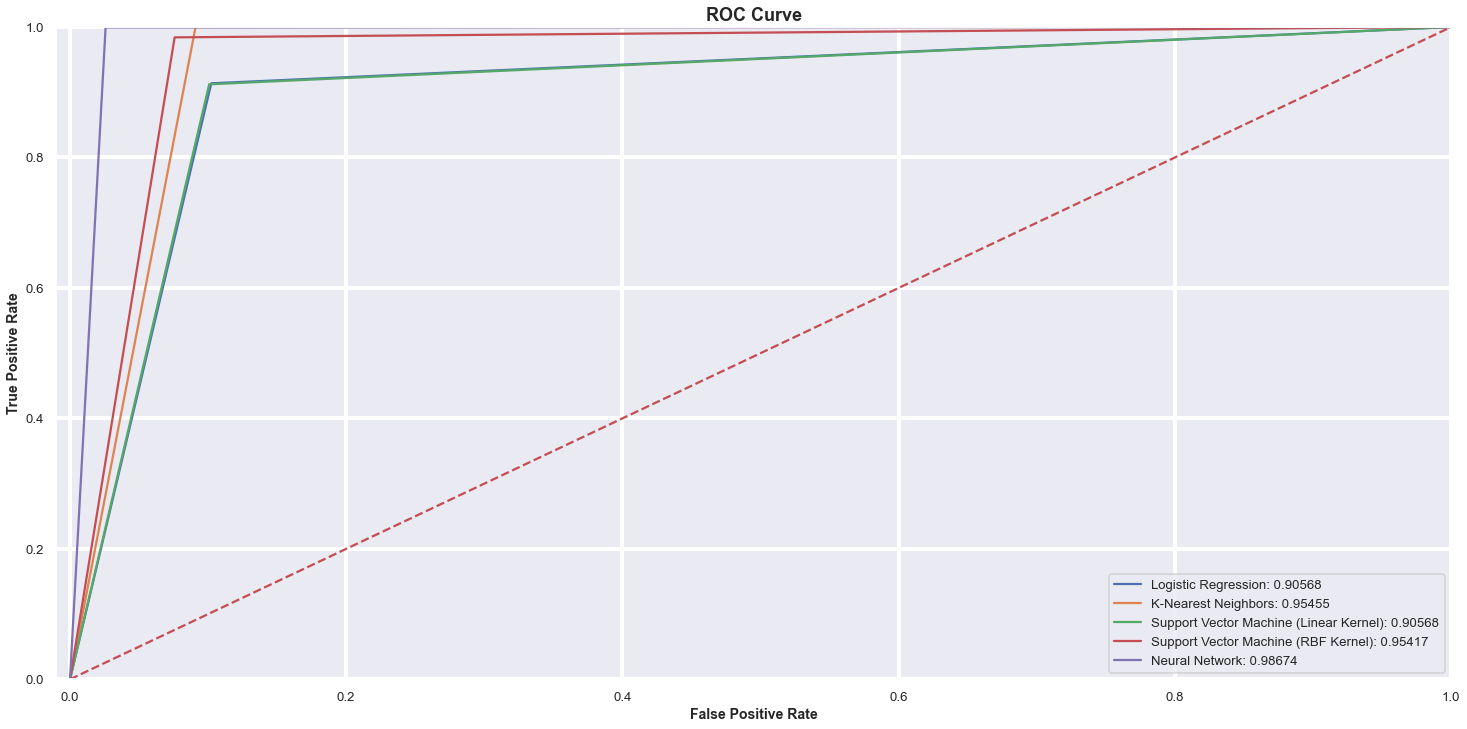

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(25,12)

for m in original_models_smote_st:
    y_pred = original_models_smote_st[m].predict(X_test_smote)
    fpr, tpr, thresholds_nb = roc_curve(y_test_smote, y_pred, pos_label=1)
    roc_auc = auc(fpr, tpr)
    precision_nb, recall_nb, th_nb = precision_recall_curve(y_test_smote, y_pred,pos_label=1)
    plt.plot(fpr, tpr, label= m + ': {:.5f}'.format(roc_auc_score(y_test_smote, y_pred)))
plt.plot([0, 1], [0, 1], 'r--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontweight='bold', fontsize=14)
plt.ylabel('True Positive Rate', fontweight='bold', fontsize=14)
plt.title('ROC Curve', fontweight='bold', fontsize=18)
plt.legend(loc='best')
plt.show()

In [32]:
Models = pd.DataFrame(columns=['Algorithm','Model Score','Precision','Recall','F1 score','ROC-AUC score'])

def taining_without_feature_selection(Parameters, Model, Dataframe, Modelname):
    
    data = Dataframe.copy()
    
    X = data.drop('Bankrupt?', axis=1)
    y = data['Bankrupt?']
    
    #Traditional split of the dataset 80% - 20%
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    x_train, x_test, y_train, y_test = x_train.values, x_test.values, y_train.values, y_test.values

    #Proportional split of 80% data with respect to the class of the target feature ie. [1,0]
    sf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

    for train_index, test_index in sf.split(x_train, y_train):
        sf_x_train, sf_x_test = X.iloc[train_index], X.iloc[test_index]
        sf_y_train, sf_y_test = y.iloc[train_index], y.iloc[test_index]

    sf_x_train, sf_x_test, sf_y_train, sf_y_test = sf_x_train.values, sf_x_test.values, sf_y_train.values, sf_y_test.values
    
    model_parameter_sm = Parameters

    rand_model = RandomizedSearchCV(Model, model_parameter_sm, n_iter=4)
     
    #Identifying the best parameters through RandomizedSearchCV()
    for train, test in sf.split(sf_x_train, sf_y_train):
        pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_model) 
        fitting_model = pipeline.fit(sf_x_train[train], sf_y_train[train])
        best_model = rand_model.best_estimator_

    #Evaluation with against 20% unseen testing data
    print()
    print("Evaluation Of Models")  

    sm = SMOTE(sampling_strategy='minority', random_state=42)
    Xsm_train, ysm_train = sm.fit_resample(sf_x_train, sf_y_train)
    
    print()
    print("Random Model Evaluation")  
    
    final_model_sm = rand_model.best_estimator_
    final_model_sm.fit(Xsm_train, ysm_train)

    prediction = final_model_sm.predict(x_test)

    print(classification_report(y_test, prediction))
    
    model = {}

    model['Algorithm'] = Modelname
    model['Model Score'] = str(round((accuracy_score(y_test, prediction)*100),2)) + "%"
    model['Precision'] = round(precision_score(y_test, prediction),2)
    model['Recall'] = round(recall_score(y_test, prediction),2)
    model['F1 score'] = round(f1_score(y_test, prediction),2)
    model['ROC-AUC score'] = round(roc_auc_score(y_test, prediction),2)
    
    return model

In [ ]:
print("K Nearest Neighbour")
TrainedModel = taining_without_feature_selection({"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}, KNeighborsClassifier(), data,"K Nearest Neighbour")
Models = Models.append(TrainedModel,ignore_index=True)

In [ ]:
print("Support Vector Classifier")
TrainedModel = taining_without_feature_selection({'C': [1,10,20],'kernel': ['rbf','linear']},  SVC(), data, "Support Vector Classifier")
Models = Models.append(TrainedModel,ignore_index=True)

In [ ]:
print("Logistic Regression")
TrainedModel = taining_without_feature_selection({"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}, LogisticRegression(solver='liblinear'), data, "Logistic Regression")
Models = Models.append(TrainedModel,ignore_index=True)

# Reduced Model : PCA Analysis

In [33]:
n_components = 74

pca = PCA(n_components)
pca.fit(X_train_smote)

X_train_reduced = pd.DataFrame(pca.transform(X_train_smote), index = X_train_smote.index, columns = ['PC' + str(i) for i in range(1, n_components + 1)])
X_test_reduced = pd.DataFrame(pca.transform(X_test_smote), index = X_test_smote.index, columns = ['PC' + str(i) for i in range(1, n_components + 1)])

In [34]:
X_train_reduced.describe()

PC1           PC2           PC3           PC4           PC5  \
count  1.055800e+04  1.055800e+04  1.055800e+04  1.055800e+04  1.055800e+04   
mean  -1.903300e-16 -3.588009e-17  2.977980e-17  8.223095e-17 -4.584744e-18   
std    3.942572e+00  2.663228e+00  2.530178e+00  2.145107e+00  1.936243e+00   
min   -2.279940e+01 -4.481910e+01 -1.018333e+01 -1.207067e+01 -1.508394e+01   
25%   -2.195625e+00 -3.741026e-01 -2.762252e-01 -1.574804e+00 -1.050218e+00   
50%   -3.426028e-03  9.439034e-02 -7.556346e-02  6.185009e-02  5.873213e-02   
75%    2.339694e+00  5.660513e-01  1.286294e-01  1.450478e+00  1.129147e+00   
max    4.789777e+01  5.815424e+01  2.413531e+02  1.504469e+01  1.940250e+01   

                PC6           PC7           PC8           PC9          PC10  \
count  1.055800e+04  1.055800e+04  1.055800e+04  1.055800e+04  1.055800e+04   
mean   1.472165e-19 -4.102084e-17 -3.797135e-17 -7.663672e-17  3.081032e-18   
std    1.729706e+00  1.616966e+00  1.592852e+00  1.503799e+00  1.379226e+00   
min   -2.640175e+01 -2.363864e+01 -4.068968e+01 -1.027235e+01 -7.804360e+00   
25%   -7.106634e-01 -5.063526e-01 -6.071485e-01 -4.089978e-01 -7.914961e-01   
50%   -5.457752e-02 -1.607193e-01  4.716848e-02 -5.846816e-02 -1.814976e-01   
75%    6.219369e-01  2.147969e-01  6.843129e-01  2.926467e-01  6.782443e-01   
max    3.807774e+01  4.297158e+01  5.472873e+01  4.149142e+01  1.609792e+01   

               PC11          PC12          PC13          PC14          PC15  \
count  1.055800e+04  1.055800e+04  1.055800e+04  1.055800e+04  1.055800e+04   
mean  -3.180929e-17  3.984836e-17  1.667753e-17  1.089665e-17 -2.419346e-17   
std    1.328399e+00  1.272775e+00  1.207214e+00  1.194457e+00  1.162591e+00   
min   -1.163280e+01 -1.190349e+01 -2.958237e+01 -1.047648e+01 -2.287743e+01   
25%   -6.464959e-01 -5.270646e-01 -5.465360e-01 -5.882772e-01 -3.511830e-01   
50%   -1.483215e-01  5.812060e-02  5.065408e-02 -1.226472e-01  2.164936e-02   
75%    5.630481e-01  5.358097e-01  5.082921e-01  3.926628e-01  3.552338e-01   
max    2.346171e+01  2.827713e+01  3.824657e+01  2.617210e+01  5.285751e+01   

               PC16          PC17          PC18          PC19          PC20  \
count  1.055800e+04  1.055800e+04  1.055800e+04  1.055800e+04  1.055800e+04   
mean  -2.794223e-17 -1.141980e-17 -9.927258e-18 -6.770909e-17  6.919177e-18   
std    1.138062e+00  1.094913e+00  1.091884e+00  1.085735e+00  1.061826e+00   
min   -1.354913e+01 -2.949823e+01 -1.657828e+01 -1.560469e+01 -1.477996e+01   
25%   -4.345308e-01 -4.261966e-01 -4.011037e-01 -5.229203e-01 -3.321635e-01   
50%   -3.023096e-02  5.161639e-02 -3.317802e-02  1.097835e-02  6.658647e-02   
75%    4.604065e-01  4.768693e-01  3.625163e-01  5.776720e-01  3.704990e-01   
max    3.057459e+01  3.601926e+01  3.167622e+01  1.705799e+01  4.256786e+01   

               PC21          PC22          PC23          PC24          PC25  \
count  1.055800e+04  1.055800e+04  1.055800e+04  1.055800e+04  1.055800e+04   
mean   4.847302e-18  8.601652e-18  6.740414e-18  9.344307e-18  2.359408e-17   
std    1.054729e+00  1.047671e+00  1.036536e+00  1.025620e+00  1.017796e+00   
min   -1.414987e+01 -1.308484e+01 -1.783744e+01 -1.881428e+01 -1.844130e+01   
25%   -3.279533e-01 -4.094405e-01 -3.828648e-01 -4.154652e-01 -1.859594e-01   
50%   -1.035683e-04 -6.692729e-02  6.884693e-03 -7.333435e-02  6.897183e-02   
75%    3.287847e-01  3.646379e-01  4.255066e-01  3.292090e-01  2.558845e-01   
max    2.200961e+01  3.492582e+01  2.373623e+01  2.884932e+01  5.641122e+01   

               PC26          PC27          PC28          PC29          PC30  \
count  1.055800e+04  1.055800e+04  1.055800e+04  1.055800e+04  1.055800e+04   
mean  -3.048697e-17 -3.693558e-19  3.379408e-17  1.944376e-18 -4.656117e-17   
std    1.010351e+00  1.005480e+00  9.981626e-01  9.946804e-01  9.918058e-01   
min   -2.417547e+01 -3.152472e+01 -1.957554e+01 -4.375670e+01 -2.649953e+01   
25%   -1.673007e-01 -2.231459e-01 -3.035021e-01 -2.406086e-01

In [35]:
############### PCA variance ratio 
fig = px.bar(
    x = ['PC' + str(i) for i in range(1, n_components + 1)],
    y = pca.explained_variance_ratio_,
    labels = {'x': "Principal Component", 'y': 'Variance Ratio'},
    color = pca.explained_variance_ratio_,
    color_continuous_scale = [(0,'darkblue'), (1, 'lightblue')],
    title = 'Proportion of variance in Principal Components'
        
)
         
fig.show()

In [36]:
################################## Dimensionality reduction
n_components = 7

pca1 = PCA(n_components)
pca1.fit(X_train_smote)

X_train_reduced0 = pd.DataFrame(pca1.transform(X_train_smote), index = X_train_smote.index, columns = ['PC' + str(i) for i in range(1, n_components + 1)])
X_test_reduced0 = pd.DataFrame(pca1.transform(X_test_smote), index = X_test_smote.index, columns = ['PC' + str(i) for i in range(1, n_components + 1)])

In [37]:
X_train_reduced0.describe()

PC1           PC2           PC3           PC4           PC5  \
count  1.055800e+04  1.055800e+04  1.055800e+04  1.055800e+04  1.055800e+04   
mean  -2.455151e-16  2.694720e-17 -7.277755e-17  3.428042e-18  4.201981e-17   
std    3.942572e+00  2.663228e+00  2.530178e+00  2.145107e+00  1.936243e+00   
min   -2.279940e+01 -4.481910e+01 -1.018332e+01 -1.207090e+01 -1.508586e+01   
25%   -2.195625e+00 -3.741028e-01 -2.762240e-01 -1.574796e+00 -1.050136e+00   
50%   -3.426027e-03  9.439074e-02 -7.556480e-02  6.184365e-02  5.877278e-02   
75%    2.339694e+00  5.660514e-01  1.286312e-01  1.450482e+00  1.129204e+00   
max    4.789777e+01  5.815422e+01  2.413532e+02  1.504507e+01  1.940552e+01   

                PC6           PC7  
count  1.055800e+04  1.055800e+04  
mean   6.486466e-17 -5.810847e-17  
std    1.729706e+00  1.616965e+00  
min   -2.639880e+01 -2.363867e+01  
25%   -7.105104e-01 -5.062365e-01  
50%   -5.476355e-02 -1.604994e-01  
75%    6.219622e-01  2.147620e-01  
max    3.807824e+01  4.296948e+01

In [38]:
pca1.explained_variance_ratio_

array([0.16534472, 0.075448  , 0.06809781, 0.04894733, 0.03987959,
       0.03182552, 0.02781194])

In [39]:
############### PCA variance ratio 
fig = px.bar(
    x = ['PC' + str(i) for i in range(1, n_components + 1)],
    y = pca1.explained_variance_ratio_,
    labels = {'x': "Principal Component", 'y': 'Variance Ratio'},
    color = pca1.explained_variance_ratio_,
    color_continuous_scale = [(0,'darkblue'), (1, 'lightblue')],
    title = 'Proportion of variance in Principal Components'
        
)
         
fig.show()


In [40]:
################## Training reduced model
reduced_models_smote = {
    "Logistic Regression": LogisticRegression(solver = "liblinear", l1_ratio = 0.5),
    "K-Nearest Neighbors": KNeighborsClassifier(weights='distance', metric='euclidean'),
    "Support Vector Machine (Linear Kernel)": LinearSVC(C = 0.5),
    "Support Vector Machine (RBF Kernel)": SVC(random_state=1, gamma=0.5, C=0.5),
    "Neural Network": MLPClassifier(solver='adam', activation='relu',alpha=1e-4,hidden_layer_sizes=(50,50,50), random_state=1,max_iter=11,verbose=10,learning_rate_init=.1),
}

for name, model in reduced_models_smote.items():
  model.fit(X_train_reduced0, y_train_smote)
  print(name + ' trained.')

Logistic Regression trained.
K-Nearest Neighbors trained.
Support Vector Machine (Linear Kernel) trained.
Support Vector Machine (RBF Kernel) trained.
Iteration 1, loss = 0.80519253
Iteration 2, loss = 0.30703564
Iteration 3, loss = 0.29868833
Iteration 4, loss = 0.27800413
Iteration 5, loss = 0.28459674
Iteration 6, loss = 0.26031571
Iteration 7, loss = 0.25153795
Iteration 8, loss = 0.25535956
Iteration 9, loss = 0.26097889
Iteration 10, loss = 0.25777444
Iteration 11, loss = 0.25177346
Neural Network trained.


In [41]:
################# Accuracy results of reduced model
reduced_results_smote = []

for name, model in reduced_models_smote.items():
  reduced_result_smote = model.score(X_test_reduced0, y_test_smote)
  reduced_results_smote.append(reduced_result_smote)

  print("""
  __________________________"""+name+"""__________________________
  """)

  model = reduced_models_smote[name]
  y_test_pred_smote = model.predict(X_test_reduced0)
  arg_test = {'y_true':y_test_smote, 'y_pred':y_test_pred_smote}
  print(confusion_matrix(**arg_test))
  print(classification_report(**arg_test))

  print(name + ': {:.5f}%'.format(reduced_result_smote * 100))


  __________________________Logistic Regression__________________________
  
[[1149  171]
 [ 157 1163]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      1320
           1       0.87      0.88      0.88      1320

    accuracy                           0.88      2640
   macro avg       0.88      0.88      0.88      2640
weighted avg       0.88      0.88      0.88      2640

Logistic Regression: 87.57576%

  __________________________K-Nearest Neighbors__________________________
  
[[1151  169]
 [  15 1305]]
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      1320
           1       0.89      0.99      0.93      1320

    accuracy                           0.93      2640
   macro avg       0.94      0.93      0.93      2640
weighted avg       0.94      0.93      0.93      2640

K-Nearest Neighbors: 93.03030%

  __________________________Support Vector Machine (Linear Kernel)_______

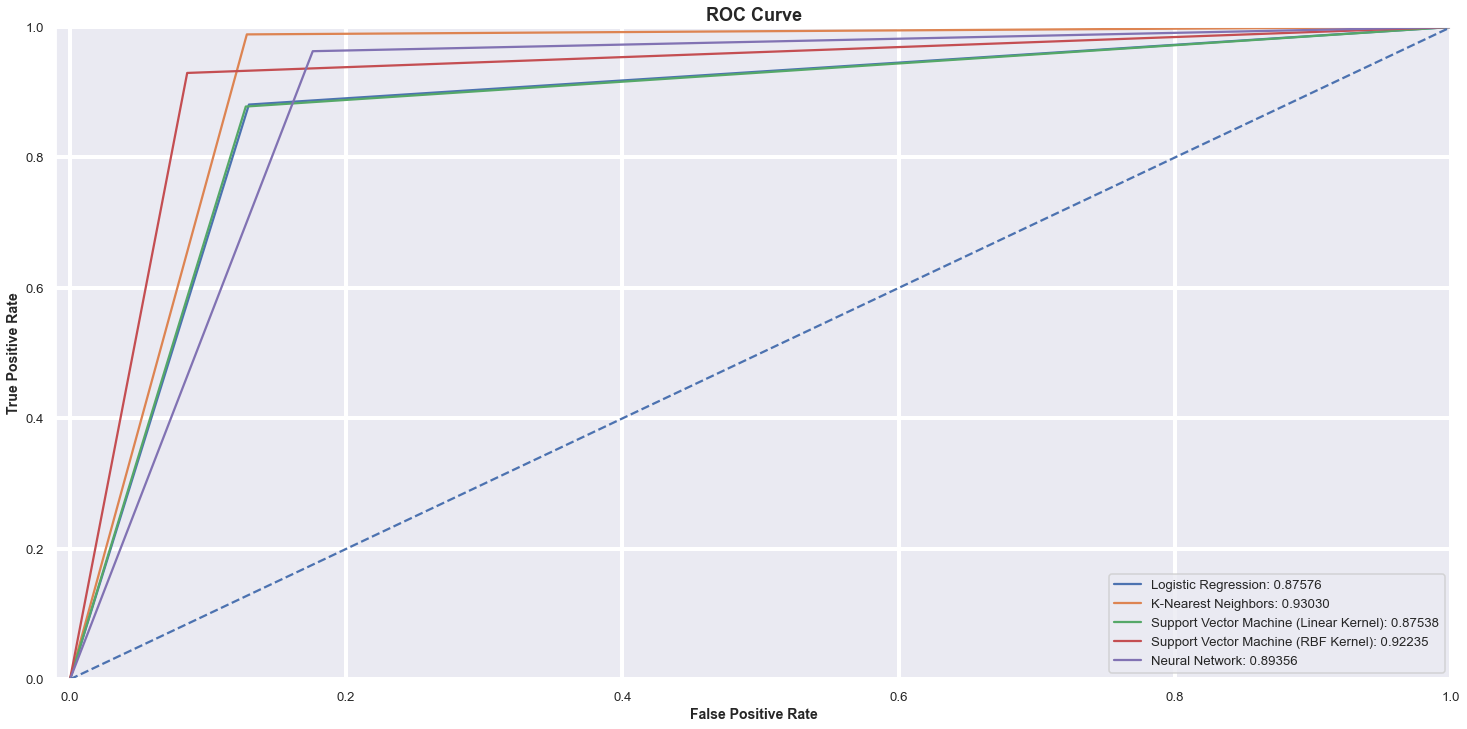

In [42]:
##################### ROC curve for Reduced model
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

fig, ax = plt.subplots()
fig.set_size_inches(25,12)

for m in reduced_models_smote:
    y_pred = reduced_models_smote[m].predict(X_test_reduced0)
    fpr, tpr, thresholds_nb = roc_curve(y_test_smote, y_pred, pos_label=1)
    roc_auc = auc(fpr, tpr)
    precision_nb, recall_nb, th_nb = precision_recall_curve(y_test_smote, y_pred,pos_label=1)
    plt.plot(fpr, tpr, label= m + ': {:.5f}'.format(roc_auc_score(y_test_smote, y_pred)))
plt.plot([0, 1], [0, 1], 'b--')
plt.axis([-0.01, 1, 0, 1])
plt.xlabel('False Positive Rate', fontweight='bold', fontsize=14)
plt.ylabel('True Positive Rate', fontweight='bold', fontsize=14)
plt.title('ROC Curve', fontweight='bold', fontsize=18)
plt.legend(loc='best')
plt.show()

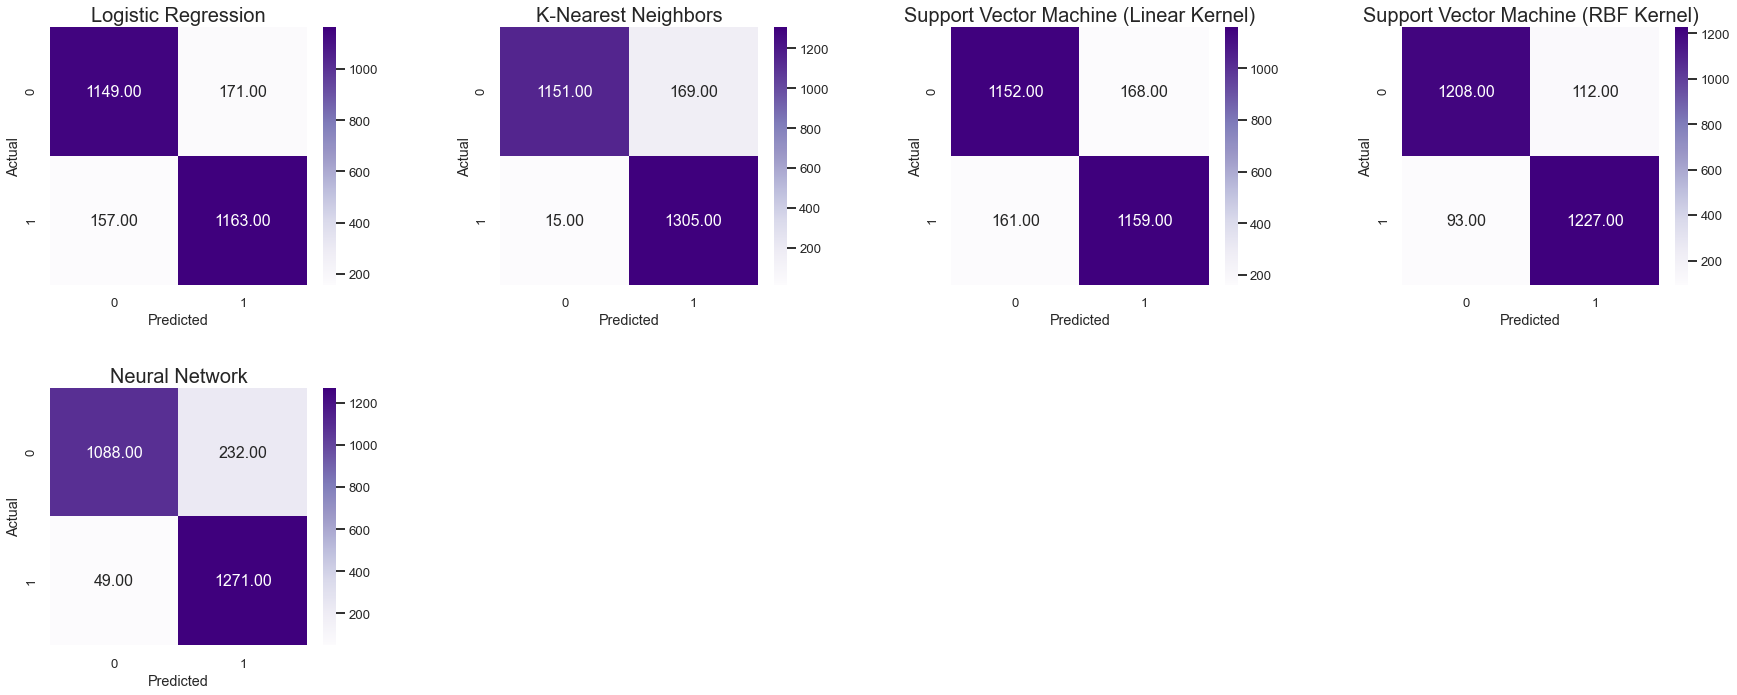

In [43]:
# Plotting confusion matrix for each classifier

a = 3  
b = 4  
c = 1

fig = plt.figure(figsize=(30, 18))

for name, model in reduced_models_smote.items():
    reduced_result_smote = model.score(X_test_reduced0, y_test_smote)
    model = reduced_models_smote[name]
    y_test_pred_smote = model.predict(X_test_reduced0)
    arg_test = {'y_true':y_test_smote, 'y_pred':y_test_pred_smote}

    conf_mx0 = confusion_matrix(y_test_smote, y_test_pred_smote)

    heat_cm0 = pd.DataFrame(conf_mx0, columns=np.unique(y_test_smote), index = np.unique(y_test_smote))
    heat_cm0.index.name = 'Actual'
    heat_cm0.columns.name = 'Predicted'

    plt.subplot(a, b, c)
    #plt.title(name)
    fig.subplots_adjust(left=None, bottom=None, right= None, top=None, wspace=0.4, hspace= 0.4)
    sns.heatmap(heat_cm0, annot=True, fmt='.2f', square=True, annot_kws={"size": 16}, cmap = 'Purples').set_title(name, fontsize = 20)
    c = c + 1

plt.show()